In [1]:
using SeisPlot
using LinearAlgebra
using Random
using DSP

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/linrongzhi/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [2]:
include("Ricker.jl")
# include("softThresh.jl")
include("SeisRadontime.jl")
include("SeisLocal.jl")
include("SeisLocalPatch.jl")
include("SeisUnlocal.jl")
include("ApplyTaper.jl")

ApplyTaper (generic function with 1 method)

┌ Warning: `conv2` is deprecated, use `conv` instead.
│   caller = top-level scope at In[3]:19
└ @ Core In[3]:19
┌ Warning: `conv2` is deprecated, use `conv` instead.
│   caller = #SeisRadontime#4(::Int64, ::Float64, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Function, ::Array{Float64,2}, ::Bool) at SeisRadontime.jl:50
└ @ Main /Users/linrongzhi/Research/Local_Radon/SeisRadontime.jl:50


Number of patches= 30
Apply Tapering...

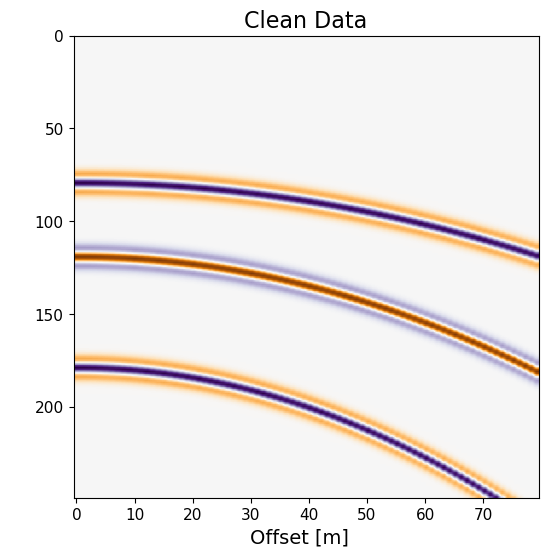

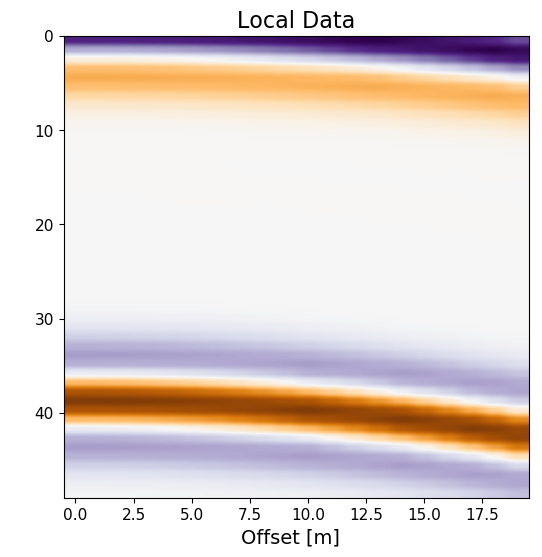

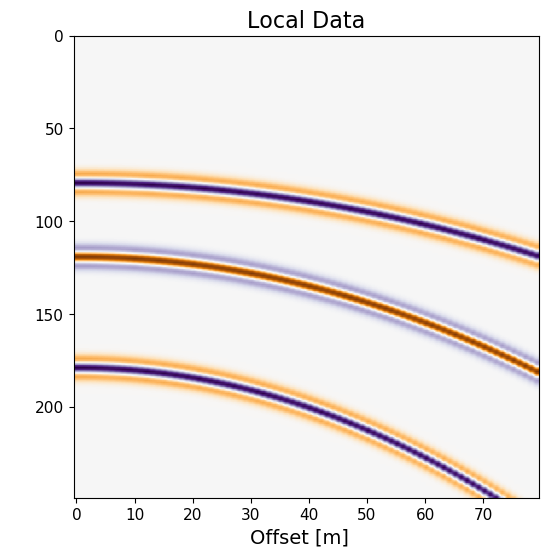

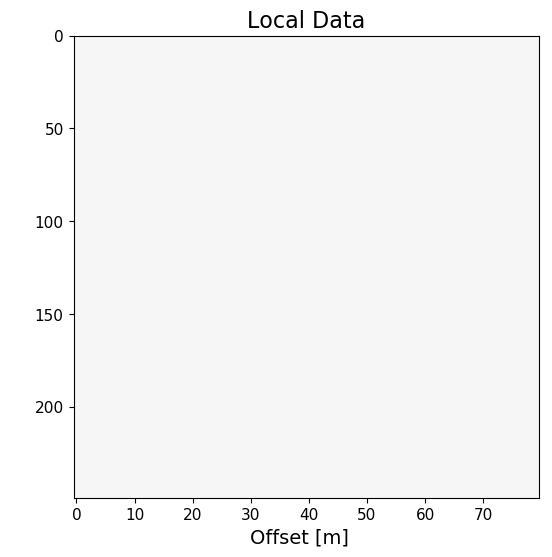

PyObject <matplotlib.image.AxesImage object at 0x13c3a5160>

In [3]:
np = 100

nh = 80
dt = 0.004
h = collect(range(0.0;stop=1000.0,length=nh))      # Desired offset of CMP gather
# p = collect(range(-0.04,stop=2.2, length=np))       # Residual moveout at far offset

p = collect(range(0.1,stop=0.4, length=np))
q = p
w = Ricker(dt=0.004,f0=20)
nt = 250;

m = zeros(nt,np);
m[80,20]  = 1;
m[120,50] =-1;
m[180,80] = 1;
# m[200,85] =-1;
w2 = reshape(w,length(w),1);
m2con = conv2(m,w2)
(nt2,nq2) = size(m2con);
m2con = m2con[Int(ceil(nt2/2)-ceil(nt/2)+1):Int(ceil(nt2/2)+ceil(nt/2)),:];

param = Dict(:nt=>nt,:dt=>dt,:R=>w,:h=>h,:q=>p);
d0 = SeisRadontime(m, true; param...);
# W = convMtx(w,M)
close("all")


param2 = Dict(:dt=>0.004,:it_WL=>50,:it_WO=>20,:dx=>1,:ix_WL=>20,:ix_WO=>20,:xmin=>1,:xmax=>80);

SeisPlotTX(d0, title="Clean Data", fignum=1,xlabel="Offset [m]",style="color",vmin=-1,vmax=1)

(OUT,Minval,Maxval) = SeisLocal(d0; param2...)
P = SeisUnlocal(OUT,Minval,Maxval,nt; param2...)

SeisPlotTX(OUT[:,:,11], title="Local Data", fignum=2,xlabel="Offset [m]",style="color",vmin=-1,vmax=1)

SeisPlotTX(P, title="Local Data", fignum=3,xlabel="Offset [m]",style="color",vmin=-1,vmax=1)

SeisPlotTX(P-d0, title="Local Data", fignum=4,xlabel="Offset [m]",style="color",vmin=-1,vmax=1)